In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%run ../utils/prepare_data.py

In [3]:
import sys
sys.path.append('../utils')

In [4]:
from prepare_data import create_grouped_list, calculate_distance_from_left, calculate_size, create_features

In [5]:
files = ["airbnb.json"]
df_l = []
for file in files:
    df_l.append(pd.read_json(f"../data/{file}"))
df = pd.concat(df_l)

In [6]:
len(df)

72

In [7]:
df.head(5)

,id,input,output,direction
0,0,"[[0, 80], [a, 32], [0, 8], [b, 103], [0, 379],...","[[a, b], c, [d, e]]",horizontal
1,13,"[[a, 122], [b, 196], [0, 673], [c, 164], [0, 2...","[[a, b], [c, d]]",horizontal
2,14,"[[a, 102], [0, 16], [b, 46], [0, 24], [c, 18],...","[[a, b], [c, d, e]]",horizontal
3,15,"[[a, 16], [0, 8], [b, 78], [0, 16], [c, 8], [0...","[[a, b], [c, d]]",horizontal
4,6,"[[a, 66], [0, 24], [b, 56], [0, 64], [c, 1294]...","[a, b, [c, d], e]",vertical


In [8]:
def plot_analysis(files):
    df_l = []
    for file in files:
        df_l.append(pd.read_json(f"../data/{file}"))
    df = pd.concat(df_l)
    output_l = []
    for idx, row in df.iterrows():
        output_l.extend(create_features(row["input"], row["output"], row["direction"], idx))
    analysis_df = pd.DataFrame(output_l, columns=["idx", "diff_distance", "diff_size", "is_same_group", "direction"])
    horizontal_df = analysis_df[analysis_df["direction"] == "horizontal"]
    vertical_df = analysis_df[analysis_df["direction"] == "vertical"]
    sns.scatterplot(
        x='diff_distance',
        y='diff_size',
        hue='is_same_group',
        data=horizontal_df,
    )
    plt.xlabel('Difference in Distance')
    plt.ylabel('Difference in Size')
    plt.title('Scatter plot based on horizontal')
    plt.legend(title='is_same_group')
    plt.show()
    sns.scatterplot(
        x='diff_distance',
        y='diff_size',
        hue='is_same_group',
        data=vertical_df,
    )
    plt.xlabel('Difference in Distance')
    plt.ylabel('Difference in Size')
    plt.title('Scatter plot based on vertical')
    plt.legend(title='is_same_group')
    plt.show()
    return df, horizontal_df, vertical_df

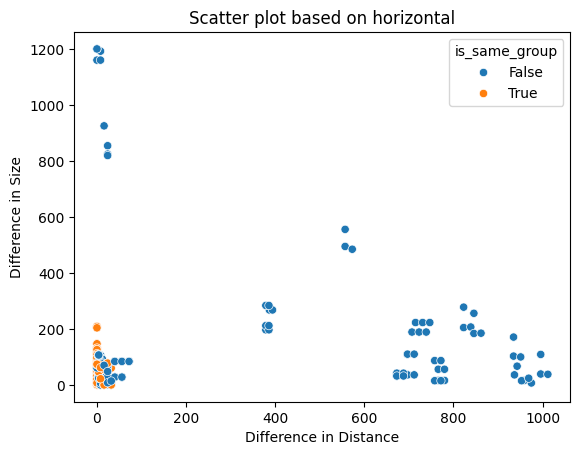

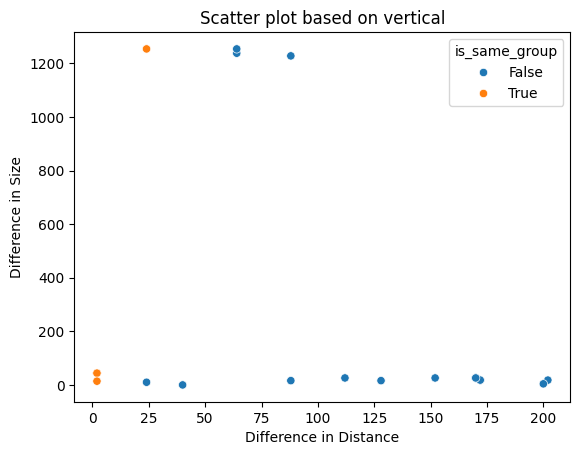

(     id                                              input  \
 0     0  [[0, 80], [a, 32], [0, 8], [b, 103], [0, 379],...   
 1    13  [[a, 122], [b, 196], [0, 673], [c, 164], [0, 2...   
 2    14  [[a, 102], [0, 16], [b, 46], [0, 24], [c, 18],...   
 3    15  [[a, 16], [0, 8], [b, 78], [0, 16], [c, 8], [0...   
 4     6  [[a, 66], [0, 24], [b, 56], [0, 64], [c, 1294]...   
 ..  ...                                                ...   
 67  208  [[a, 16], [0, 8], [b, 78], [0, 16], [c, 8], [0...   
 68    0  [[0, 80], [a, 32], [0, 8], [b, 103], [0, 386],...   
 69   12  [[a, 122], [b, 196], [0, 688], [c, 164], [0, 2...   
 70   13  [[a, 102], [0, 16], [b, 46], [0, 24], [c, 18],...   
 71   14  [[a, 16], [0, 8], [b, 78], [0, 16], [c, 8], [0...   
 
                  output   direction  
 0   [[a, b], c, [d, e]]  horizontal  
 1      [[a, b], [c, d]]  horizontal  
 2   [[a, b], [c, d, e]]  horizontal  
 3      [[a, b], [c, d]]  horizontal  
 4     [a, b, [c, d], e]    vertical  
 ..     

In [9]:
plot_analysis(["airbnb.json"])

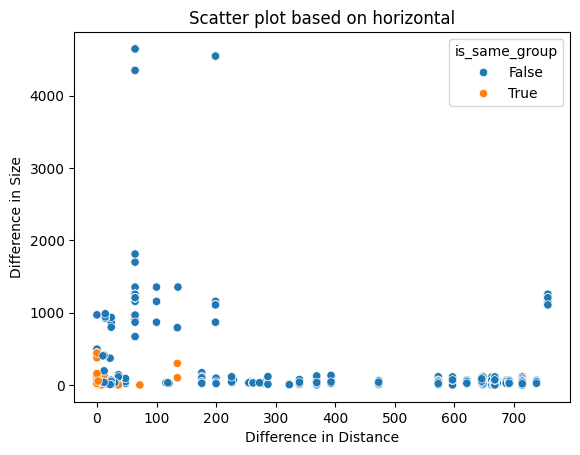

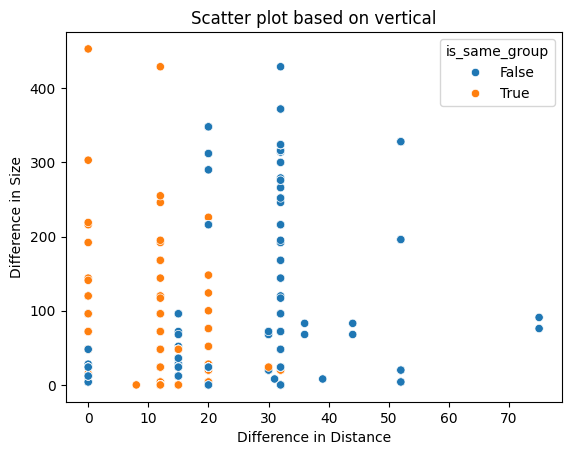

(      id                                              input  \
 0      1  [[0, 64], [a, 51], [0, 24], [b, 117], [c, 70],...   
 1     11  [[a, 58], [0, 340], [b, 83], [c, 115], [d, 116...   
 2     41  [[a, 372], [0, 20], [b, 24], [0, 12], [c, 120]...   
 3     44  [[a, 372], [0, 20], [b, 24], [0, 12], [c, 120]...   
 4    148  [[0, 253], [a, 101], [0, 12], [b, 16], [0, 12]...   
 ..   ...                                                ...   
 582   45  [[a, 48], [0, 20], [b, 24], [0, 12], [c, 24], ...   
 583   52       [[a, 36], [b, 24], [0, 15], [c, 24], [d, 0]]   
 584   54       [[a, 36], [b, 24], [0, 15], [c, 24], [d, 0]]   
 585   56       [[a, 36], [b, 24], [0, 15], [c, 24], [d, 0]]   
 586   58       [[a, 36], [b, 24], [0, 15], [c, 24], [d, 0]]   
 
                                     output   direction  
 0    [a, [b, c, d, e], f, [g, h, i, j, k]]  horizontal  
 1         [a, [b, c, d, e, f, g, h, i, j]]  horizontal  
 2                           [a, [b, c, d]]    vertical 

In [10]:
plot_analysis(["uber.json"])

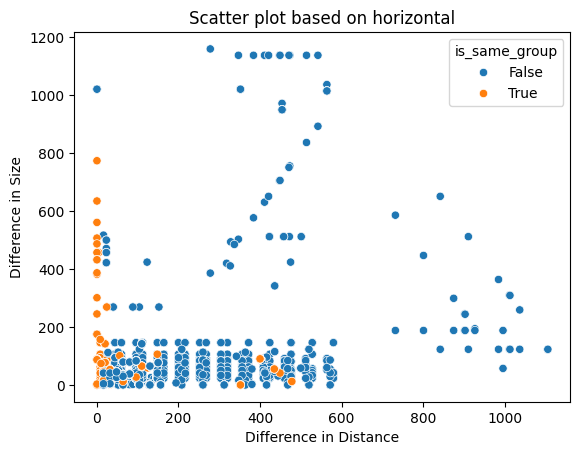

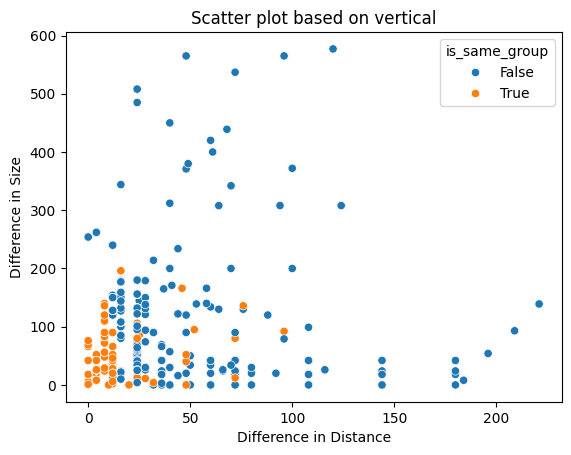

(     id                                              input  \
 0    14     [[a, 58], [0, 12], [b, 78], [0, 32], [c, 292]]   
 1    18     [[a, 58], [0, 12], [b, 78], [0, 25], [c, 223]]   
 2    22  [[0, 386], [a, 99], [0, 16], [b, 54], [0, 16],...   
 3     4  [[a, 40], [0, 12], [b, 280], [c, 26], [0, 4], ...   
 4     5  [[a, 40], [0, 12], [b, 280], [c, 26], [0, 4], ...   
 ..   ..                                                ...   
 536  61   [[a, 190], [b, 189], [0, 24], [c, 164], [d, 88]]   
 537  64    [[a, 58], [0, 12], [b, 104], [0, 16], [c, 189]]   
 538  67      [[a, 58], [0, 12], [b, 78], [0, 16], [c, 88]]   
 539  71     [[a, 58], [0, 12], [b, 52], [0, 16], [c, 196]]   
 540  84  [[0, 386], [a, 99], [0, 16], [b, 54], [0, 16],...   
 
                       output   direction  
 0                [[a, b], c]    vertical  
 1                [[a, b], c]    vertical  
 2    [[a, b, c, d], e, f, g]  horizontal  
 3             [a, b, [c, d]]    vertical  
 4             [a, b, 

In [11]:
plot_analysis(["retool.json"])

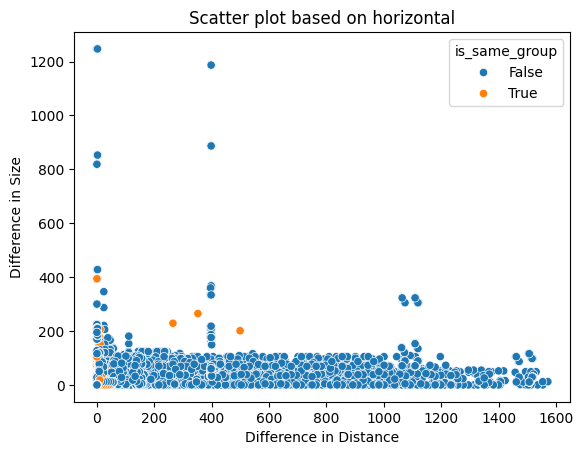

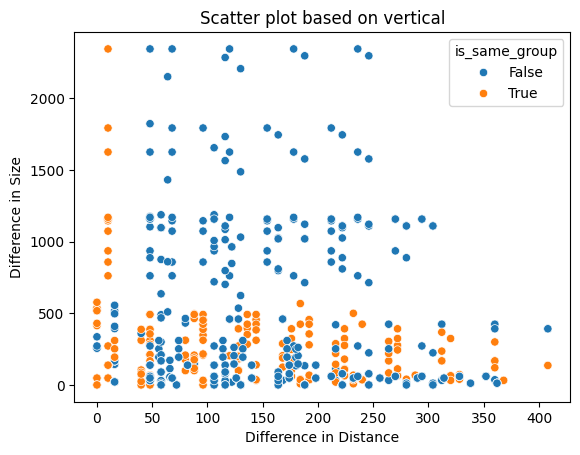

(         id                                              input  \
 0    123457  [[a, 100], [0, 585], [b, 75], [c, 157], [d, 89...   
 1    123460  [[0, 18], [a, 18], [0, 12], [b, 12], [0, 36], ...   
 2         0  [[a, 544], [b, 288], [0, 40], [c, 184], [0, 40...   
 3        15     [[a, 318], [0, 8], [b, 318], [0, 8], [c, 435]]   
 4        17  [[a, 229], [0, 265], [b, 458], [0, 24], [c, 112]]   
 ..      ...                                                ...   
 843     521  [[0, 8], [a, 12], [0, 8], [b, 10], [0, 8], [c,...   
 844     535  [[0, 1], [a, 89], [0, 10], [b, 71], [0, 1062],...   
 845     537                      [[a, 179], [b, 179], [0, 16]]   
 846     539                      [[a, 179], [b, 179], [0, 16]]   
 847     541                       [[a, 197], [b, 2], [c, 197]]   
 
                                                 output   direction  
 0                                    [a, [b, c, d, e]]  horizontal  
 1                   [[a, b], [c, d, e, f, g, h], i, j

In [12]:
plot_analysis(["wego.json"])

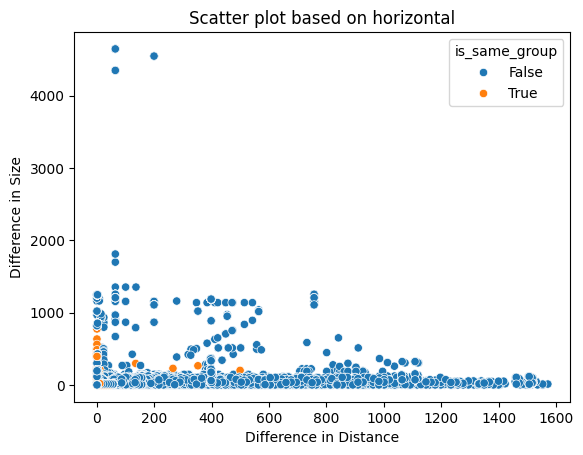

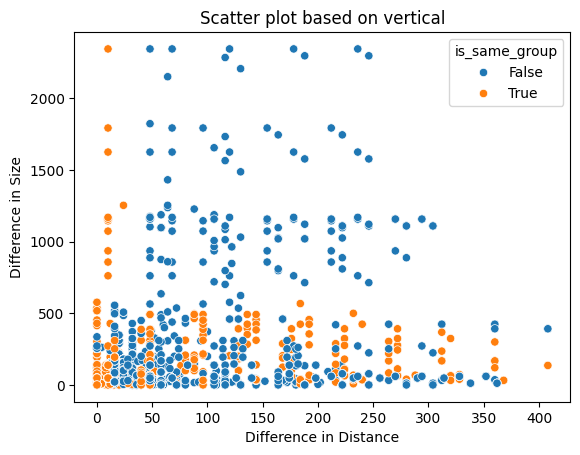

In [13]:
raw_df, horizontal_df, vertical_df = plot_analysis(["airbnb.json", "uber.json","retool.json", "wego.json"])

In [26]:
raw_df

,id,input,output,direction
0,0,"[[0, 80], [a, 32], [0, 8], [b, 103], [0, 379],...","[[a, b], c, [d, e]]",horizontal
1,13,"[[a, 122], [b, 196], [0, 673], [c, 164], [0, 2...","[[a, b], [c, d]]",horizontal
2,14,"[[a, 102], [0, 16], [b, 46], [0, 24], [c, 18],...","[[a, b], [c, d, e]]",horizontal
3,15,"[[a, 16], [0, 8], [b, 78], [0, 16], [c, 8], [0...","[[a, b], [c, d]]",horizontal
4,6,"[[a, 66], [0, 24], [b, 56], [0, 64], [c, 1294]...","[a, b, [c, d], e]",vertical
...,...,...,...,...
843,521,"[[0, 8], [a, 12], [0, 8], [b, 10], [0, 8], [c,...","[[a, b, c, d, e, f, g], h]",horizontal
844,535,"[[0, 1], [a, 89], [0, 10], [b, 71], [0, 1062],...","[[a, b], [c, d, e], [f, g, h], [i, j], [k], [l...",horizontal
845,537,"[[a, 179], [b, 179], [0, 16]]","[[a, b]]",horizontal
846,539,"[[a, 179], [b, 179], [0, 16]]","[[a, b]]",horizontal


In [22]:
horizontal_df.head(10)

,idx,diff_distance,diff_size,is_same_group,direction,predict
0,0,8,71,True,horizontal,True
1,0,387,268,False,horizontal,False
2,0,766,16,False,horizontal,False
3,0,766,56,False,horizontal,False
4,0,379,197,False,horizontal,False
5,0,758,87,False,horizontal,False
6,0,758,15,False,horizontal,False
7,0,379,284,False,horizontal,False
8,0,379,212,False,horizontal,False
9,0,0,72,True,horizontal,False


In [26]:
from sklearn.metrics import accuracy_score, recall_score, f1_score
accuracy = accuracy_score(horizontal_df["is_same_group"], horizontal_df["predict"])
recall = recall_score(horizontal_df["is_same_group"], horizontal_df["predict"])
f1_score = f1_score(horizontal_df["is_same_group"], horizontal_df["predict"])

In [25]:
accuracy

0.9729138373321261

In [29]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1: {f1_score:.2f}")

Accuracy: 0.97
Recall: 0.97
F1: 0.96


In [31]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score
import joblib

def train_model(df, output_file):
# Splitting into input features and target variable
    X = df[['diff_distance', 'diff_size']]
    y = df['is_same_group']
    
    # Splitting data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Creating and training the Decision Tree classifier
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)
    
    # Predicting on the test set
    y_pred = clf.predict(X_test)
    
    # Evaluating the model
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1: {f1:.2f}")
    joblib.dump(clf, output_file)

In [32]:
train_model(horizontal_df, 'horizontal_decision_tree_model.pkl')

Accuracy: 0.97
Recall: 0.96
F1: 0.95


In [33]:
train_model(vertical_df, 'vertical_decision_tree_model.pkl')

Accuracy: 0.97
Recall: 0.94
F1: 0.96


In [14]:
import joblib
model = joblib.load("horizontal_decision_tree_model.pkl")

In [16]:
y = model.predict(horizontal_df[["diff_distance", "diff_size"]])

In [17]:
y

array([ True, False, False, ..., False,  True, False])

In [18]:
horizontal_df["predict"] = y

In [20]:
a = horizontal_df[horizontal_df["idx"] == 0]

In [21]:
a

,idx,diff_distance,diff_size,is_same_group,direction,predict
0,0,8,71,True,horizontal,True
1,0,387,268,False,horizontal,False
2,0,766,16,False,horizontal,False
3,0,766,56,False,horizontal,False
4,0,379,197,False,horizontal,False
...,...,...,...,...,...,...
20447,0,0,14,True,horizontal,True
20448,0,8,48,True,horizontal,False
20449,0,0,68,True,horizontal,True
20450,0,8,34,True,horizontal,False
